In [56]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
import pickle
import yaml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay



In [10]:
datos_train = pd.read_csv(r'C:\Users\Sengan\Desktop\Proyecto-ML\Train Data\train.csv')

In [12]:
X = datos_train[['Share pledge ratio of controlling shareholders',
        'Pledge ratio of unlimited shares',
        'audit opinion ',
        'Downgrade or negative',
        'Ratio of other receivables to total assets',
        'ROA',
        'Asset liability ratio',
        'Pledge ratio of limited sale shares',
        'ROE',
        'Enterprise age']]
y = datos_train['IsDefault']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
def evaluate_model(y_true, y_pred, model_name):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='binary', zero_division=1),
        "Recall": recall_score(y_true, y_pred, average='binary', zero_division=1),
        "F1-Score": f1_score(y_true, y_pred, average='binary', zero_division=1),
        "ROC AUC": roc_auc_score(y_true, y_pred),
    }
    return metrics

In [29]:
results = []

In [ ]:
# 1. Regresión Logística
model_1 = LogisticRegression(C= 10, penalty='l2', random_state=42)
model_1.fit(X_train_scaled, y_train)
y_pred_logistic = model_1.predict(X_test_scaled)
results.append(evaluate_model(y_test, y_pred_logistic, "Logistic Regression"))

In [ ]:
# 2. SVM Lineal
model_2 = SVC(C= 1 , kernel='linear', random_state=42)
model_2.fit(X_train_scaled, y_train)
y_pred_svm = model_2.predict(X_test_scaled)
results.append(evaluate_model(y_test, y_pred_svm, "Linear SVM"))

In [ ]:
# 3. KNN
model_3 = KNeighborsClassifier(n_neighbors=5, weights= 'distance')
model_3.fit(X_train_scaled, y_train)
y_pred_knn = model_3.predict(X_test_scaled)
results.append(evaluate_model(y_test, y_pred_knn, "KNN"))

In [ ]:
# 4. Random Forest
model_4 = RandomForestClassifier(max_depth= None ,n_estimators=100, random_state=42)
model4.fit(X_train, y_train)  # No necesita escalado
y_pred_rf = model4.predict(X_test)
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))

In [32]:
#5. XGBoost
model_5 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_5.fit(X_train, y_train)  # No necesita escalado
y_pred_xgb = model_5.predict(X_test)
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))

c:\Users\Sengan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [26]:
# 6. Red Neuronal (MLP)
model_6 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Capa oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(1, activation='sigmoid')  # Capa de salida
])

model_6.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_6.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=16, 
                    validation_split=0.2, 
                    verbose=1)

model_6.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
y_pred_keras = (model_6.predict(X_test_scaled) > 0.5).astype("int32")
results.append(evaluate_model(y_test, y_pred_keras, "Neural Network (Keras)"))

Epoch 1/50


c:\Users\Sengan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5911 - loss: 0.6445 - val_accuracy: 0.8261 - val_loss: 0.4159
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8570 - loss: 0.3663 - val_accuracy: 0.8424 - val_loss: 0.3371
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8658 - loss: 0.3200 - val_accuracy: 0.8533 - val_loss: 0.3138
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9059 - loss: 0.2559 - val_accuracy: 0.8533 - val_loss: 0.3024
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9099 - loss: 0.2524 - val_accuracy: 0.8750 - val_loss: 0.2943
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9164 - loss: 0.2215 - val_accuracy: 0.8804 - val_loss: 0.2906
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9161 - loss: 0.2164 - val_accuracy: 0.9022 - val_loss: 0.2859
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8785 - loss: 0.2784 - val_accuracy: 0.8641 - val_loss: 0.2869
Ep

In [27]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print(results_df)

                    Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
4                 XGBoost  0.878261   0.696970  0.560976  0.621622  0.754033
0     Logistic Regression  0.873913   0.714286  0.487805  0.579710  0.722738
1              Linear SVM  0.865217   0.692308  0.439024  0.537313  0.698348
6  Neural Network (Keras)  0.860870   0.666667  0.439024  0.529412  0.695703
3           Random Forest  0.856522   0.625000  0.487805  0.547945  0.712156
5  Neural Network (Keras)  0.856522   0.642857  0.439024  0.521739  0.693057
2                     KNN  0.834783   0.551724  0.390244  0.457143  0.660730


In [21]:
# Diccionario para almacenar los mejores modelos y resultados
best_models = {}

# 1. GridSearch para Regresión Logística
param_grid_logistic = {'C': [0.1, 1, 10, 100], 'penalty': ['l2']}
grid_logistic = GridSearchCV(LogisticRegression(random_state=42), param_grid_logistic, cv=5, scoring='f1')
grid_logistic.fit(X_train_scaled, y_train)
best_models["model_1"] = grid_logistic.best_params_, grid_logistic.best_score_, grid_logistic.best_estimator_

# 2. GridSearch para SVM Lineal
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='f1')
grid_svm.fit(X_train_scaled, y_train)
best_models["model_2"] = grid_svm.best_params_, grid_svm.best_score_, grid_logistic.best_estimator_


# 3. GridSearch para KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train_scaled, y_train)
best_models["model_3"] = grid_knn.best_params_, grid_knn.best_score_, grid_logistic.best_estimator_


# 4. GridSearch para Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
best_models["model_4"] = grid_rf.best_params_, grid_rf.best_score_, grid_logistic.best_estimator_


# 5. GridSearch para XGBoost
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
grid_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss', random_state=42), param_grid_xgb, cv=5, scoring='f1')
grid_xgb.fit(X_train, y_train)
best_models["model_5"] = grid_xgb.best_params_, grid_xgb.best_score_, grid_logistic.best_estimator_


# Mostrar los mejores hiperparámetros y puntajes
import pandas as pd
best_models_df = pd.DataFrame.from_dict(best_models, orient='index', columns=['Best Params', 'Best F1-Score', 'best_estimator'])
print(best_models_df)

                                               Best Params  Best F1-Score  \
model_1                         {'C': 10, 'penalty': 'l2'}       0.648476   
model_2                       {'C': 1, 'kernel': 'linear'}       0.612379   
model_3          {'n_neighbors': 5, 'weights': 'distance'}       0.566287   
model_4  {'max_depth': None, 'min_samples_split': 2, 'n...       0.668515   
model_5  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...       0.715209   

                                    best_estimator  
model_1  LogisticRegression(C=10, random_state=42)  
model_2  LogisticRegression(C=10, random_state=42)  
model_3  LogisticRegression(C=10, random_state=42)  
model_4  LogisticRegression(C=10, random_state=42)  
model_5  LogisticRegression(C=10, random_state=42)  


In [20]:
class KerasGridSearch(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.001, neurons=64, batch_size=32, epochs=50, verbose=0):
        self.learning_rate = learning_rate
        self.neurons = neurons
        self.batch_size = batch_size
        self.epochs = epochs
        self.verbose = verbose
        self.model_ = None

    def build_model(self):
        model = Sequential([
            Dense(self.neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dense(int(self.neurons / 2), activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(learning_rate=self.learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=self.verbose)
        return self

    def predict(self, X):
        predictions = self.model_.predict(X)
        return (predictions > 0.5).astype(int)

# Definir espacio de búsqueda
param_grid_keras = {
    'learning_rate': [0.001, 0.01],
    'neurons': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# Integrar con GridSearchCV
keras_grid = GridSearchCV(KerasGridSearch(verbose=0), param_grid_keras, cv=3, scoring='f1')
keras_grid.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros y puntaje
print("Best Params for Neural Network:", keras_grid.best_params_)
print("Best F1-Score for Neural Network:", keras_grid.best_score_)
print("Best Model Estimatid", keras_grid.best_estimator_)

c:\Users\Sengan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Sengan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Sengan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sengan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metr

Best Params for Neural Network: {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.001, 'neurons': 32}
Best F1-Score for Neural Network: nan
Best Model Estimatid KerasGridSearch(batch_size=16, neurons=32)


In [24]:
def guardar_modelos(modelos):
    for i, (key, value) in enumerate(modelos.items(), start=1):
        file_name = f"model_{i}.pkl"
        with open(file_name, 'wb') as file:
            pickle.dump(value[2], file)
    print(f"Se han guardado {len(modelos)} modelos exitosamente.")


In [28]:
modelo_final = grid_xgb.best_estimator_  

with open('modelo_final_xgboost.pkl', 'wb') as file:
    pickle.dump(modelo_final, file)


In [29]:
with open('keras_grid_search.pkl', 'wb') as file:
    pickle.dump(keras_grid.best_estimator_, file)

# Guardar el modelo Keras subyacente
best_model_keras = keras_grid.best_estimator_.model_
best_model_keras.save('best_keras_model.h5')


In [33]:
modelo_final_config = modelo_final.get_params()

# Guardar la configuración del modelo en un archivo YAML
config_file_name = 'model_config.yaml'
with open(config_file_name, 'w') as file:
    yaml.dump(modelo_final_config, file)

In [36]:
y_pred_xgb = model_5.predict(X_test)
y_pred_proba_xgb = model_5.predict_proba(X_test)[:, 1] 

In [39]:
metrics_xgb = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1-Score": f1_score(y_test, y_pred_xgb),
    "ROC AUC Score": roc_auc_score(y_test, y_pred_proba_xgb)
}

In [40]:
classification_report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Class 0", "Class 1"])

metrics_xgb, classification_report_xgb

({'Accuracy': 0.8782608695652174,
  'Precision': np.float64(0.696969696969697),
  'Recall': np.float64(0.5609756097560976),
  'F1-Score': np.float64(0.6216216216216216),
  'ROC AUC Score': np.float64(0.9081171764098593)},
 '              precision    recall  f1-score   support\n\n     Class 0       0.91      0.95      0.93       189\n     Class 1       0.70      0.56      0.62        41\n\n    accuracy                           0.88       230\n   macro avg       0.80      0.75      0.77       230\nweighted avg       0.87      0.88      0.87       230\n')

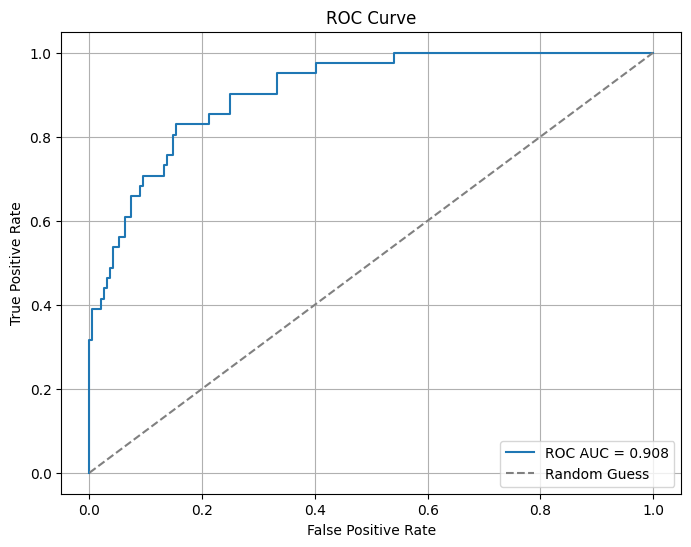

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {metrics_xgb['ROC AUC Score']:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

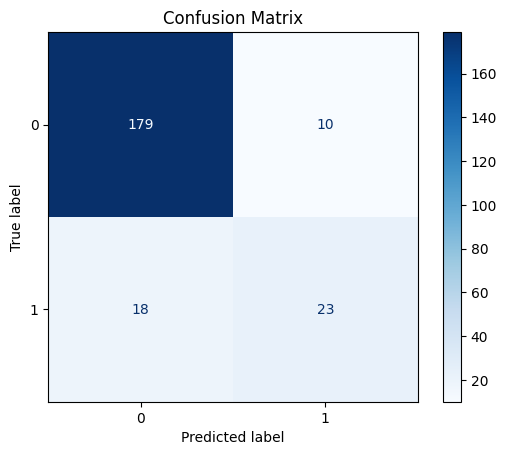

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

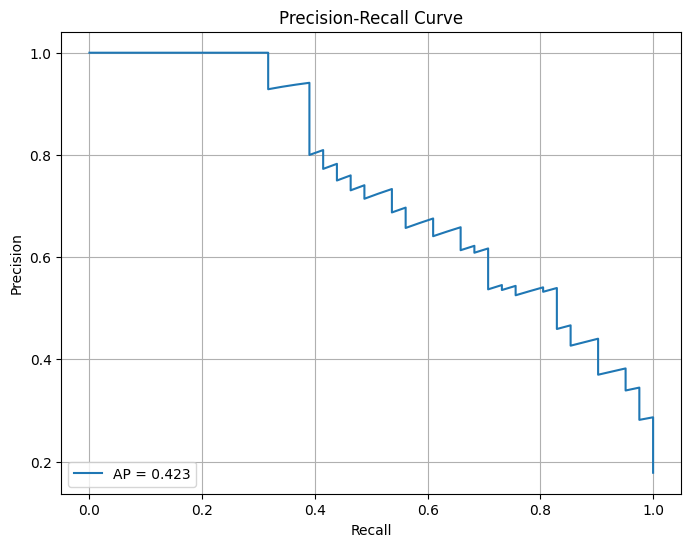

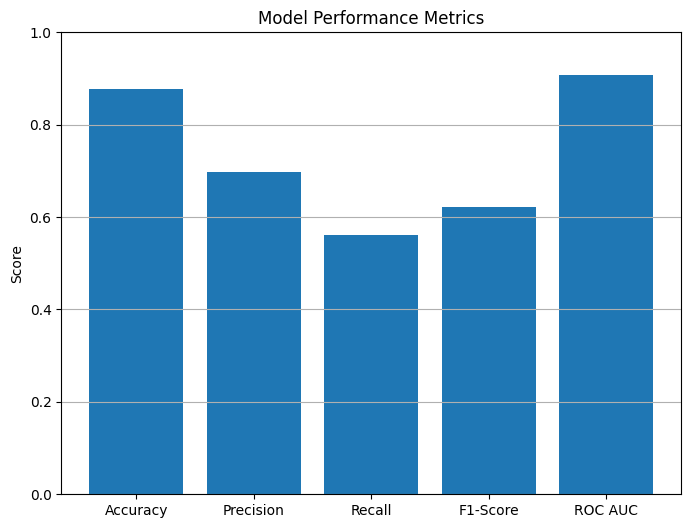

In [57]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {precision.mean():.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()

# Bar chart of main metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1-Score": f1_score(y_test, y_pred_xgb),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_xgb),
}

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values())
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()

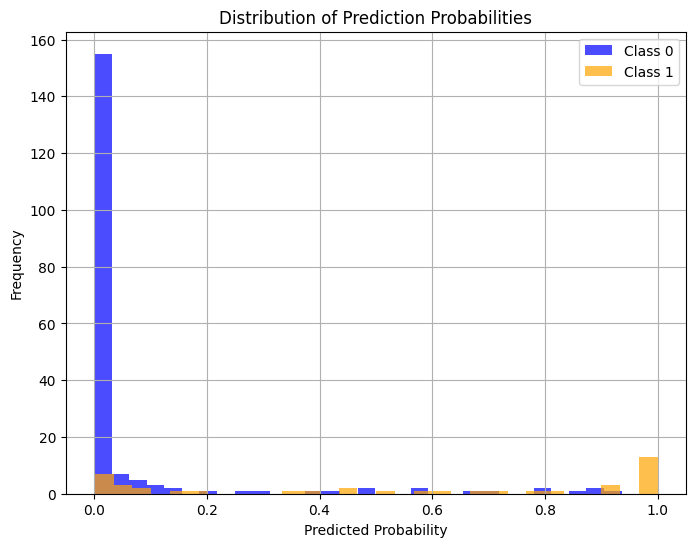

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba_xgb[y_test == 0], bins=30, alpha=0.7, label="Class 0", color="blue")
plt.hist(y_pred_proba_xgb[y_test == 1], bins=30, alpha=0.7, label="Class 1", color="orange")
plt.title("Distribution of Prediction Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

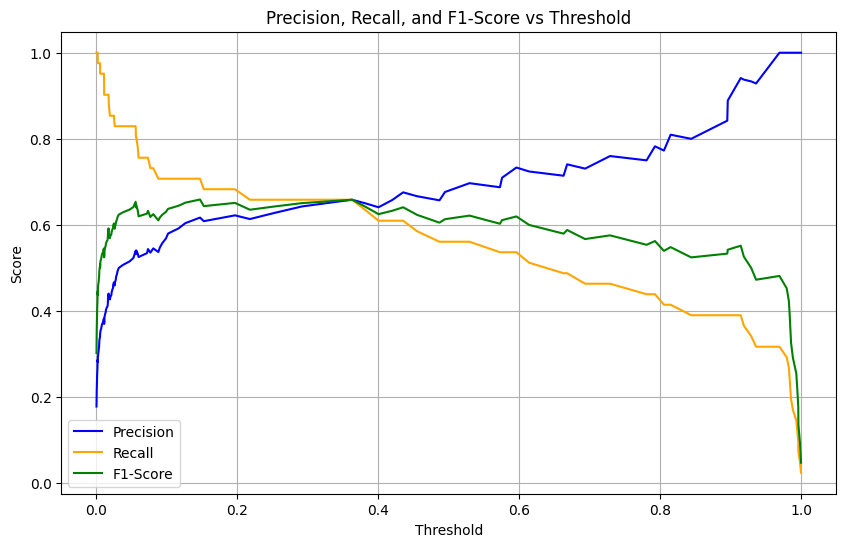

In [ ]:
thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)[2]
precision = precision[:-1]  
recall = recall[:-1]        

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label="Precision", color="blue")
plt.plot(thresholds, recall, label="Recall", color="orange")
plt.plot(thresholds, 2 * (precision * recall) / (precision + recall), label="F1-Score", color="green")
plt.title("Precision, Recall, and F1-Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

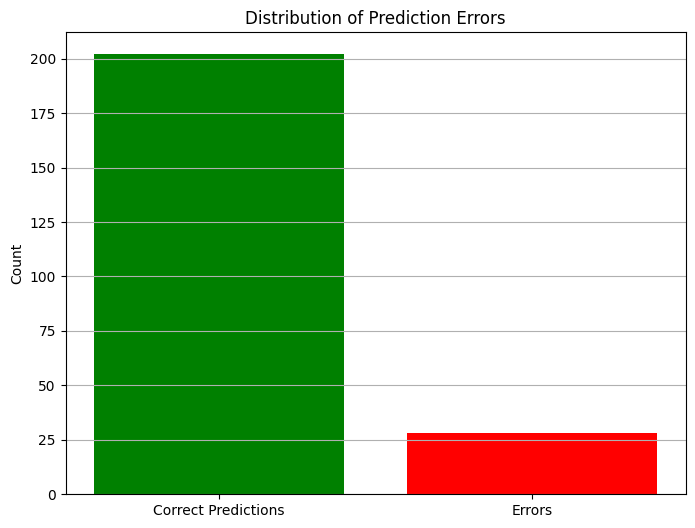

In [60]:
errors = (y_test != y_pred_xgb).astype(int)  # 1 for errors, 0 for correct predictions
plt.figure(figsize=(8, 6))
plt.bar(["Correct Predictions", "Errors"], [len(errors) - errors.sum(), errors.sum()], color=["green", "red"])
plt.title("Distribution of Prediction Errors")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()

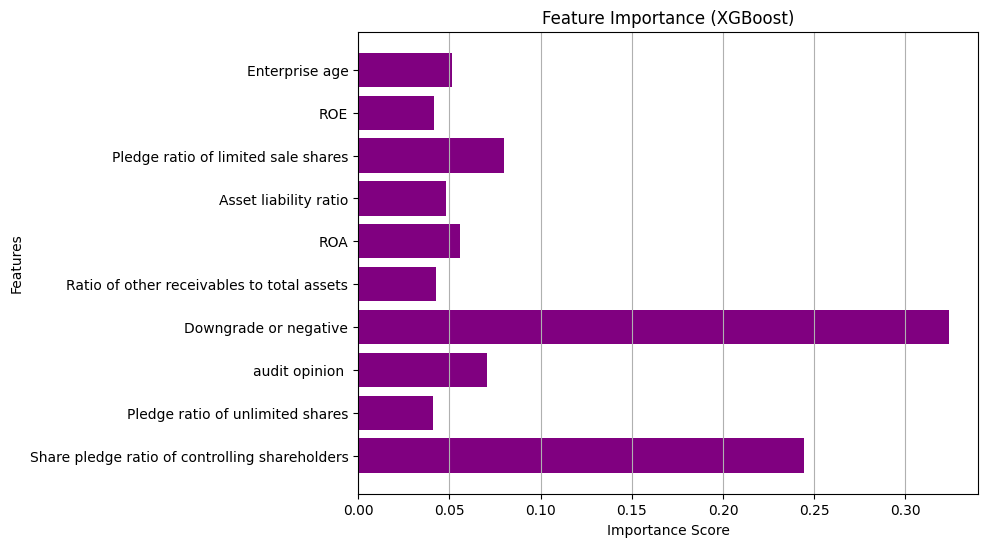

In [61]:
feature_importance = model_5.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(X_train.columns, feature_importance, color="purple")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(axis="x")
plt.show()